# Bankruptcy Detection

In [2]:
# Importing the basic libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore Warning 
import warnings
warnings.filterwarnings(action="ignore")

In [5]:
# Defining the working directory 
input_path = "C:\\Users\\ritesh.bz.kumar\\OneDrive - Accenture\\Documents\\Task\\GIT\\Bankruptcy-Detection-main"

In [6]:
# Importing data 
bank_data = pd.read_csv(input_path+'\data.csv')
bank_data.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [7]:
# Creating a copy of the data
data = bank_data.copy()
data.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [8]:
# Checking the column name
data.columns

Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit

Here column name needs to be cleaned 

In [9]:
data.columns = data.columns.str.strip().str.replace(" ","_").str.upper()
data.rename(columns = {'BANKRUPT?': 'BANKRUPT'}, inplace=True)

In [10]:
# Columns name is in correct format
data.head()

,BANKRUPT,ROA(C)_BEFORE_INTEREST_AND_DEPRECIATION_BEFORE_INTEREST,ROA(A)_BEFORE_INTEREST_AND_%_AFTER_TAX,ROA(B)_BEFORE_INTEREST_AND_DEPRECIATION_AFTER_TAX,OPERATING_GROSS_MARGIN,REALIZED_SALES_GROSS_MARGIN,OPERATING_PROFIT_RATE,PRE-TAX_NET_INTEREST_RATE,AFTER-TAX_NET_INTEREST_RATE,NON-INDUSTRY_INCOME_AND_EXPENDITURE/REVENUE,...,NET_INCOME_TO_TOTAL_ASSETS,TOTAL_ASSETS_TO_GNP_PRICE,NO-CREDIT_INTERVAL,GROSS_PROFIT_TO_SALES,NET_INCOME_TO_STOCKHOLDER'S_EQUITY,LIABILITY_TO_EQUITY,DEGREE_OF_FINANCIAL_LEVERAGE_(DFL),INTEREST_COVERAGE_RATIO_(INTEREST_EXPENSE_TO_EBIT),NET_INCOME_FLAG,EQUITY_TO_LIABILITY
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   BANKRUPT                                                 6819 non-null   int64  
 1   ROA(C)_BEFORE_INTEREST_AND_DEPRECIATION_BEFORE_INTEREST  6819 non-null   float64
 2   ROA(A)_BEFORE_INTEREST_AND_%_AFTER_TAX                   6819 non-null   float64
 3   ROA(B)_BEFORE_INTEREST_AND_DEPRECIATION_AFTER_TAX        6819 non-null   float64
 4   OPERATING_GROSS_MARGIN                                   6819 non-null   float64
 5   REALIZED_SALES_GROSS_MARGIN                              6819 non-null   float64
 6   OPERATING_PROFIT_RATE                                    6819 non-null   float64
 7   PRE-TAX_NET_INTEREST_RATE                                6819 non-null   float64
 8   AFTER-TAX_NET_INTEREST_RATE 

__The dataset is composed of a combination of 6819 observations per each of our 96 features.__

- All of the features are numerical (int64 or float64)
- There are no missing values (Nan) among the data

Considering that all our features are numeric, we can easily calculate their descriptive statistics: a futher source of information.

In [12]:
data.describe()

,BANKRUPT,ROA(C)_BEFORE_INTEREST_AND_DEPRECIATION_BEFORE_INTEREST,ROA(A)_BEFORE_INTEREST_AND_%_AFTER_TAX,ROA(B)_BEFORE_INTEREST_AND_DEPRECIATION_AFTER_TAX,OPERATING_GROSS_MARGIN,REALIZED_SALES_GROSS_MARGIN,OPERATING_PROFIT_RATE,PRE-TAX_NET_INTEREST_RATE,AFTER-TAX_NET_INTEREST_RATE,NON-INDUSTRY_INCOME_AND_EXPENDITURE/REVENUE,...,NET_INCOME_TO_TOTAL_ASSETS,TOTAL_ASSETS_TO_GNP_PRICE,NO-CREDIT_INTERVAL,GROSS_PROFIT_TO_SALES,NET_INCOME_TO_STOCKHOLDER'S_EQUITY,LIABILITY_TO_EQUITY,DEGREE_OF_FINANCIAL_LEVERAGE_(DFL),INTEREST_COVERAGE_RATIO_(INTEREST_EXPENSE_TO_EBIT),NET_INCOME_FLAG,EQUITY_TO_LIABILITY
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


__Checking the nan values, There no null value present in any features__

In [13]:
#data.isnull().sum()
#[print(col) for col in data if data[col].isna().sum()>0]
[print(col) for col in data if data[col].isnull().sum()>0]

[]

__Checking for duplicates, There is no duplicacy__

In [14]:
data.duplicated().sum()

0

#### Checking the output variable 

In [15]:
#print(data['BANKRUPT'].value_counts())
print('Finacial Stable count: {}'.format(data['BANKRUPT'].value_counts()[0]))
print('Finacial Un_Stable count: {}'.format(data['BANKRUPT'].value_counts()[1]))
Financial_Stable = data['BANKRUPT'].value_counts()[0]/len(data) *100
Financial_Un_Stable = data['BANKRUPT'].value_counts()[1]/len(data) *100
print('Financial_Stable %: {:.2f}'.format(Financial_Stable))
print('Financial_Un_Stable %: {:.2f}'.format(Financial_Un_Stable))

Finacial Stable count: 6599
Finacial Un_Stable count: 220
Financial_Stable %: 96.77
Financial_Un_Stable %: 3.23


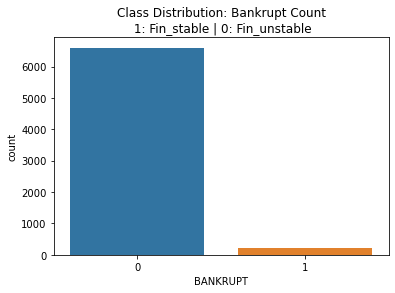

In [13]:
# Checking label distribution of BANKRUPT(o/p) feature using graph
sns.countplot(x='BANKRUPT' , data =data)
plt.title('Class Distribution: Bankrupt Count\n 1: Fin_stable | 0: Fin_unstable')
plt.show()

Looking at the above data and plot we can clearly see how our labels are strongly unbalanced, and this is a the main obstacle that we need to solve to obtain good performances.

## Exploratory Data Analysis (EDA).

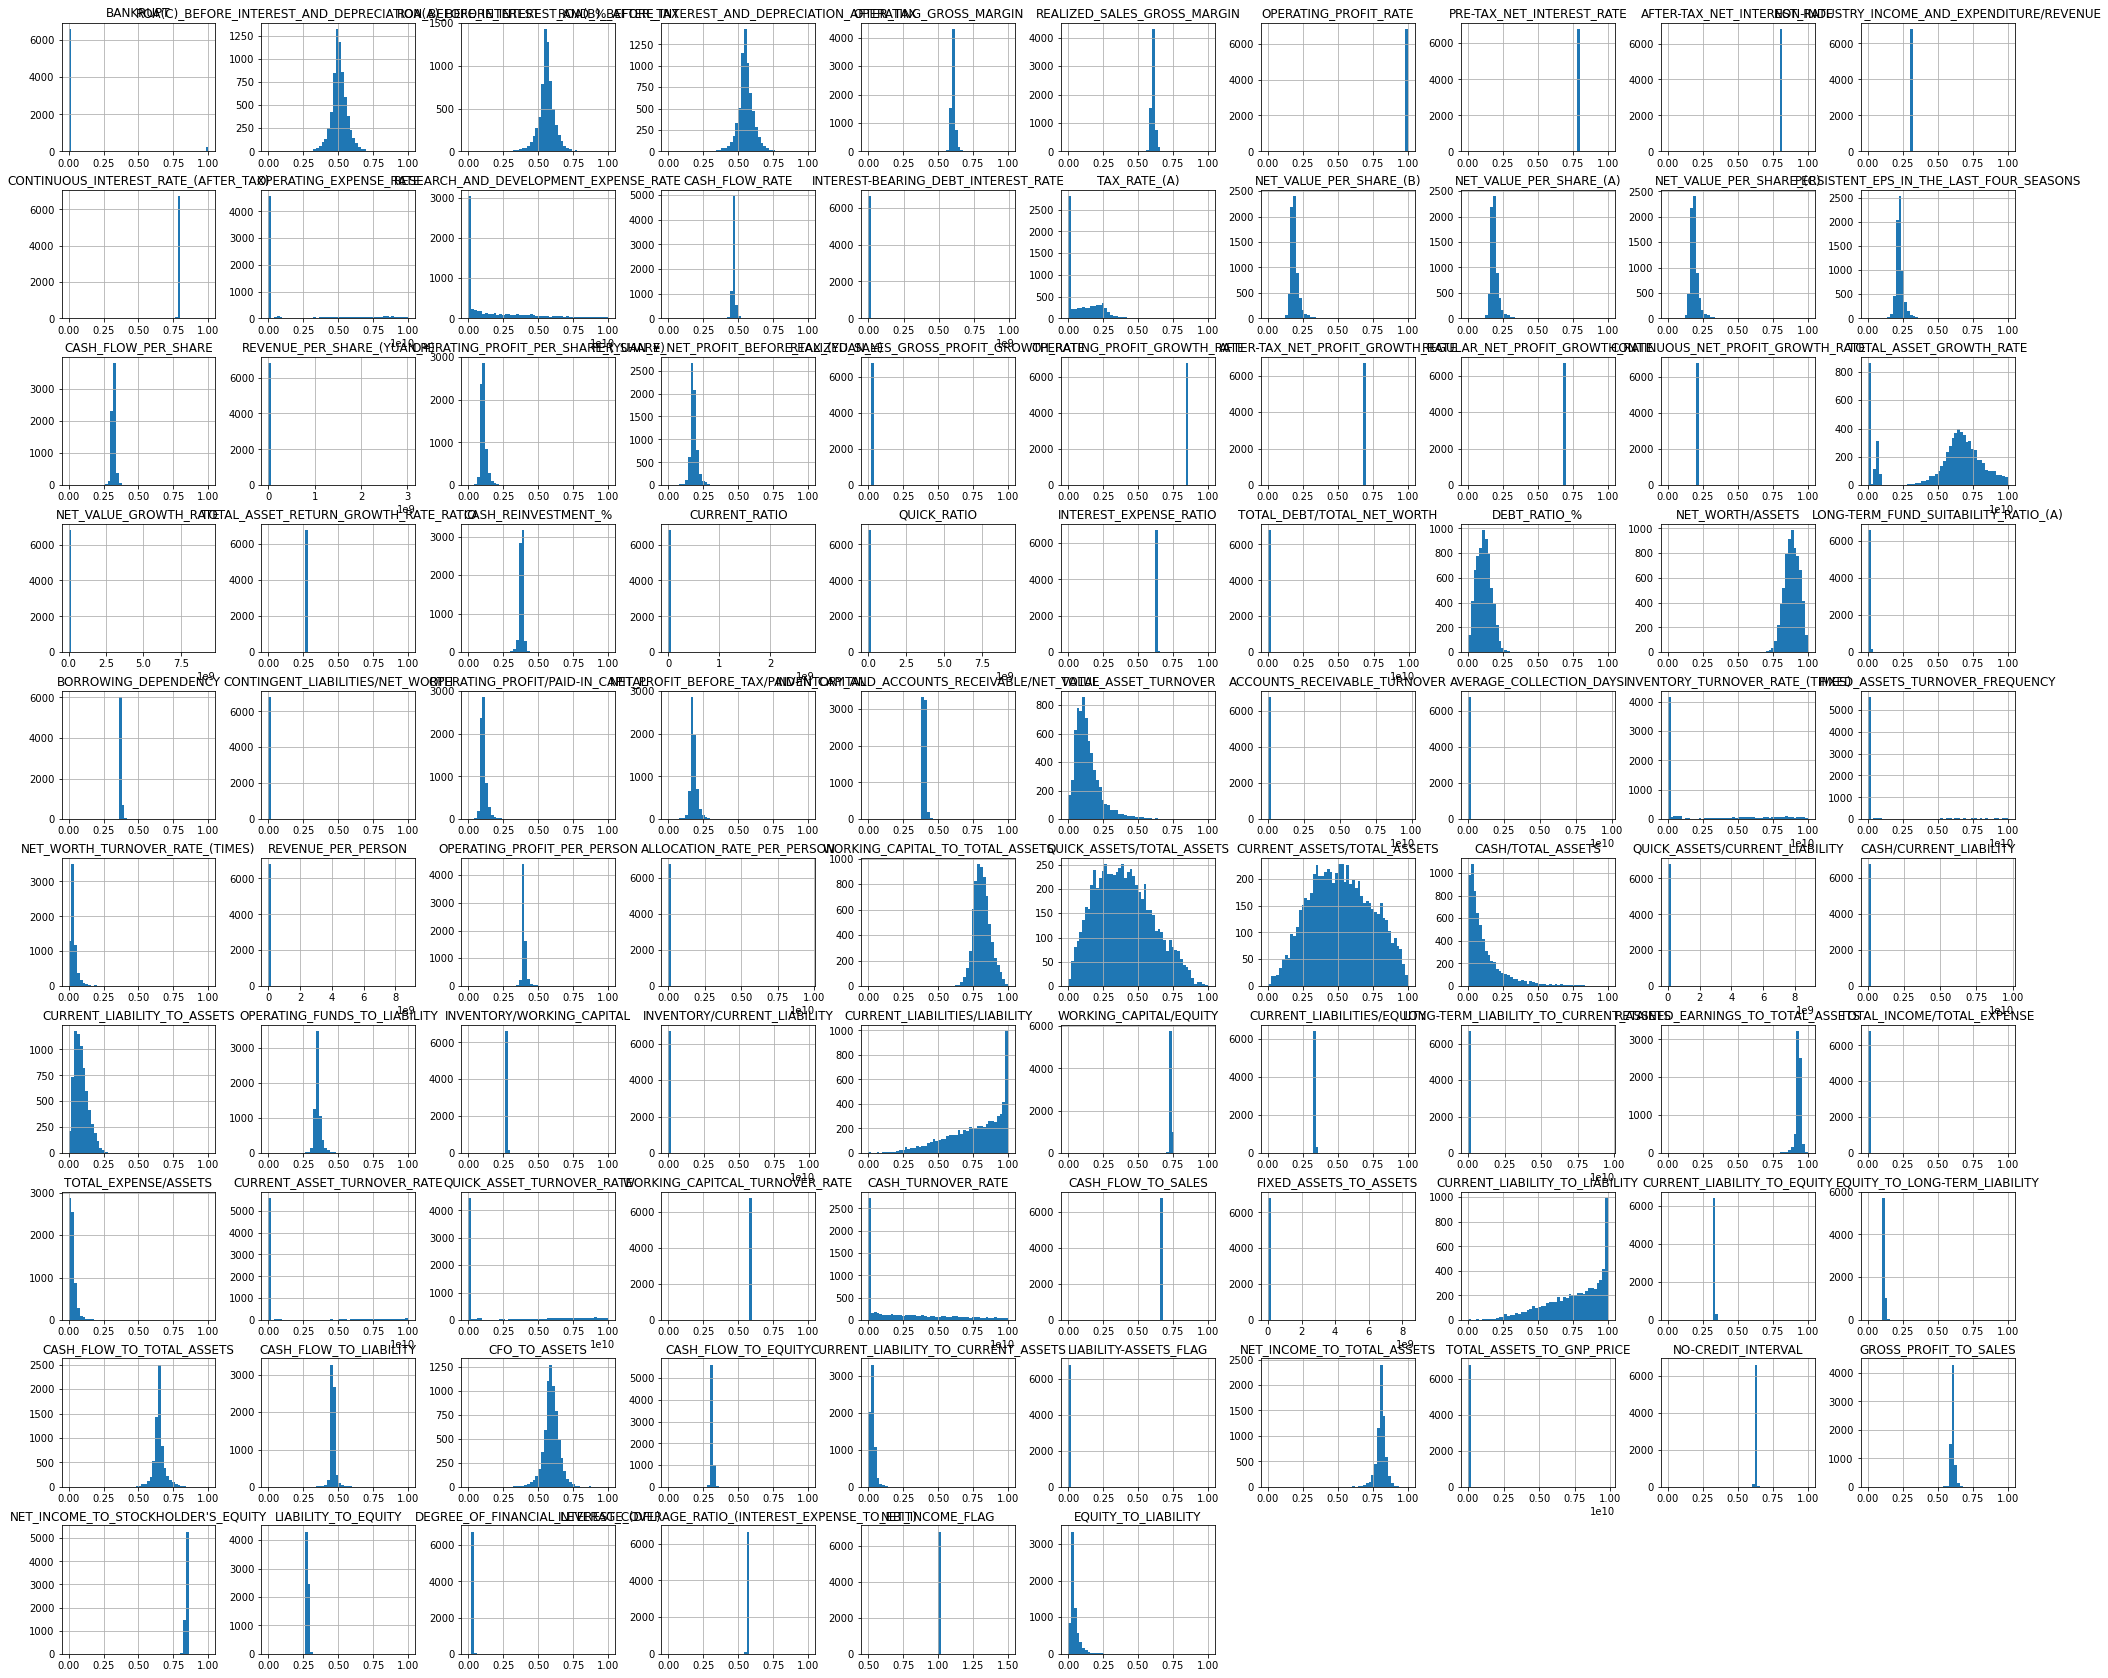

In [14]:
# To check the distribution of the features
data.hist(figsize=(35,30), bins=50)
plt.show()

From the above graph, we can conclude that their are few features in the data where skewness is available.

### Correlation using seaborn heatmap 
Correlation refers to a process for establishing the relationships between two variables. 

We will be using Spearman correlation as this is best suitable for the continuous features where data is not normally distribution.

In Pearson Correlation data should be normally distributed.

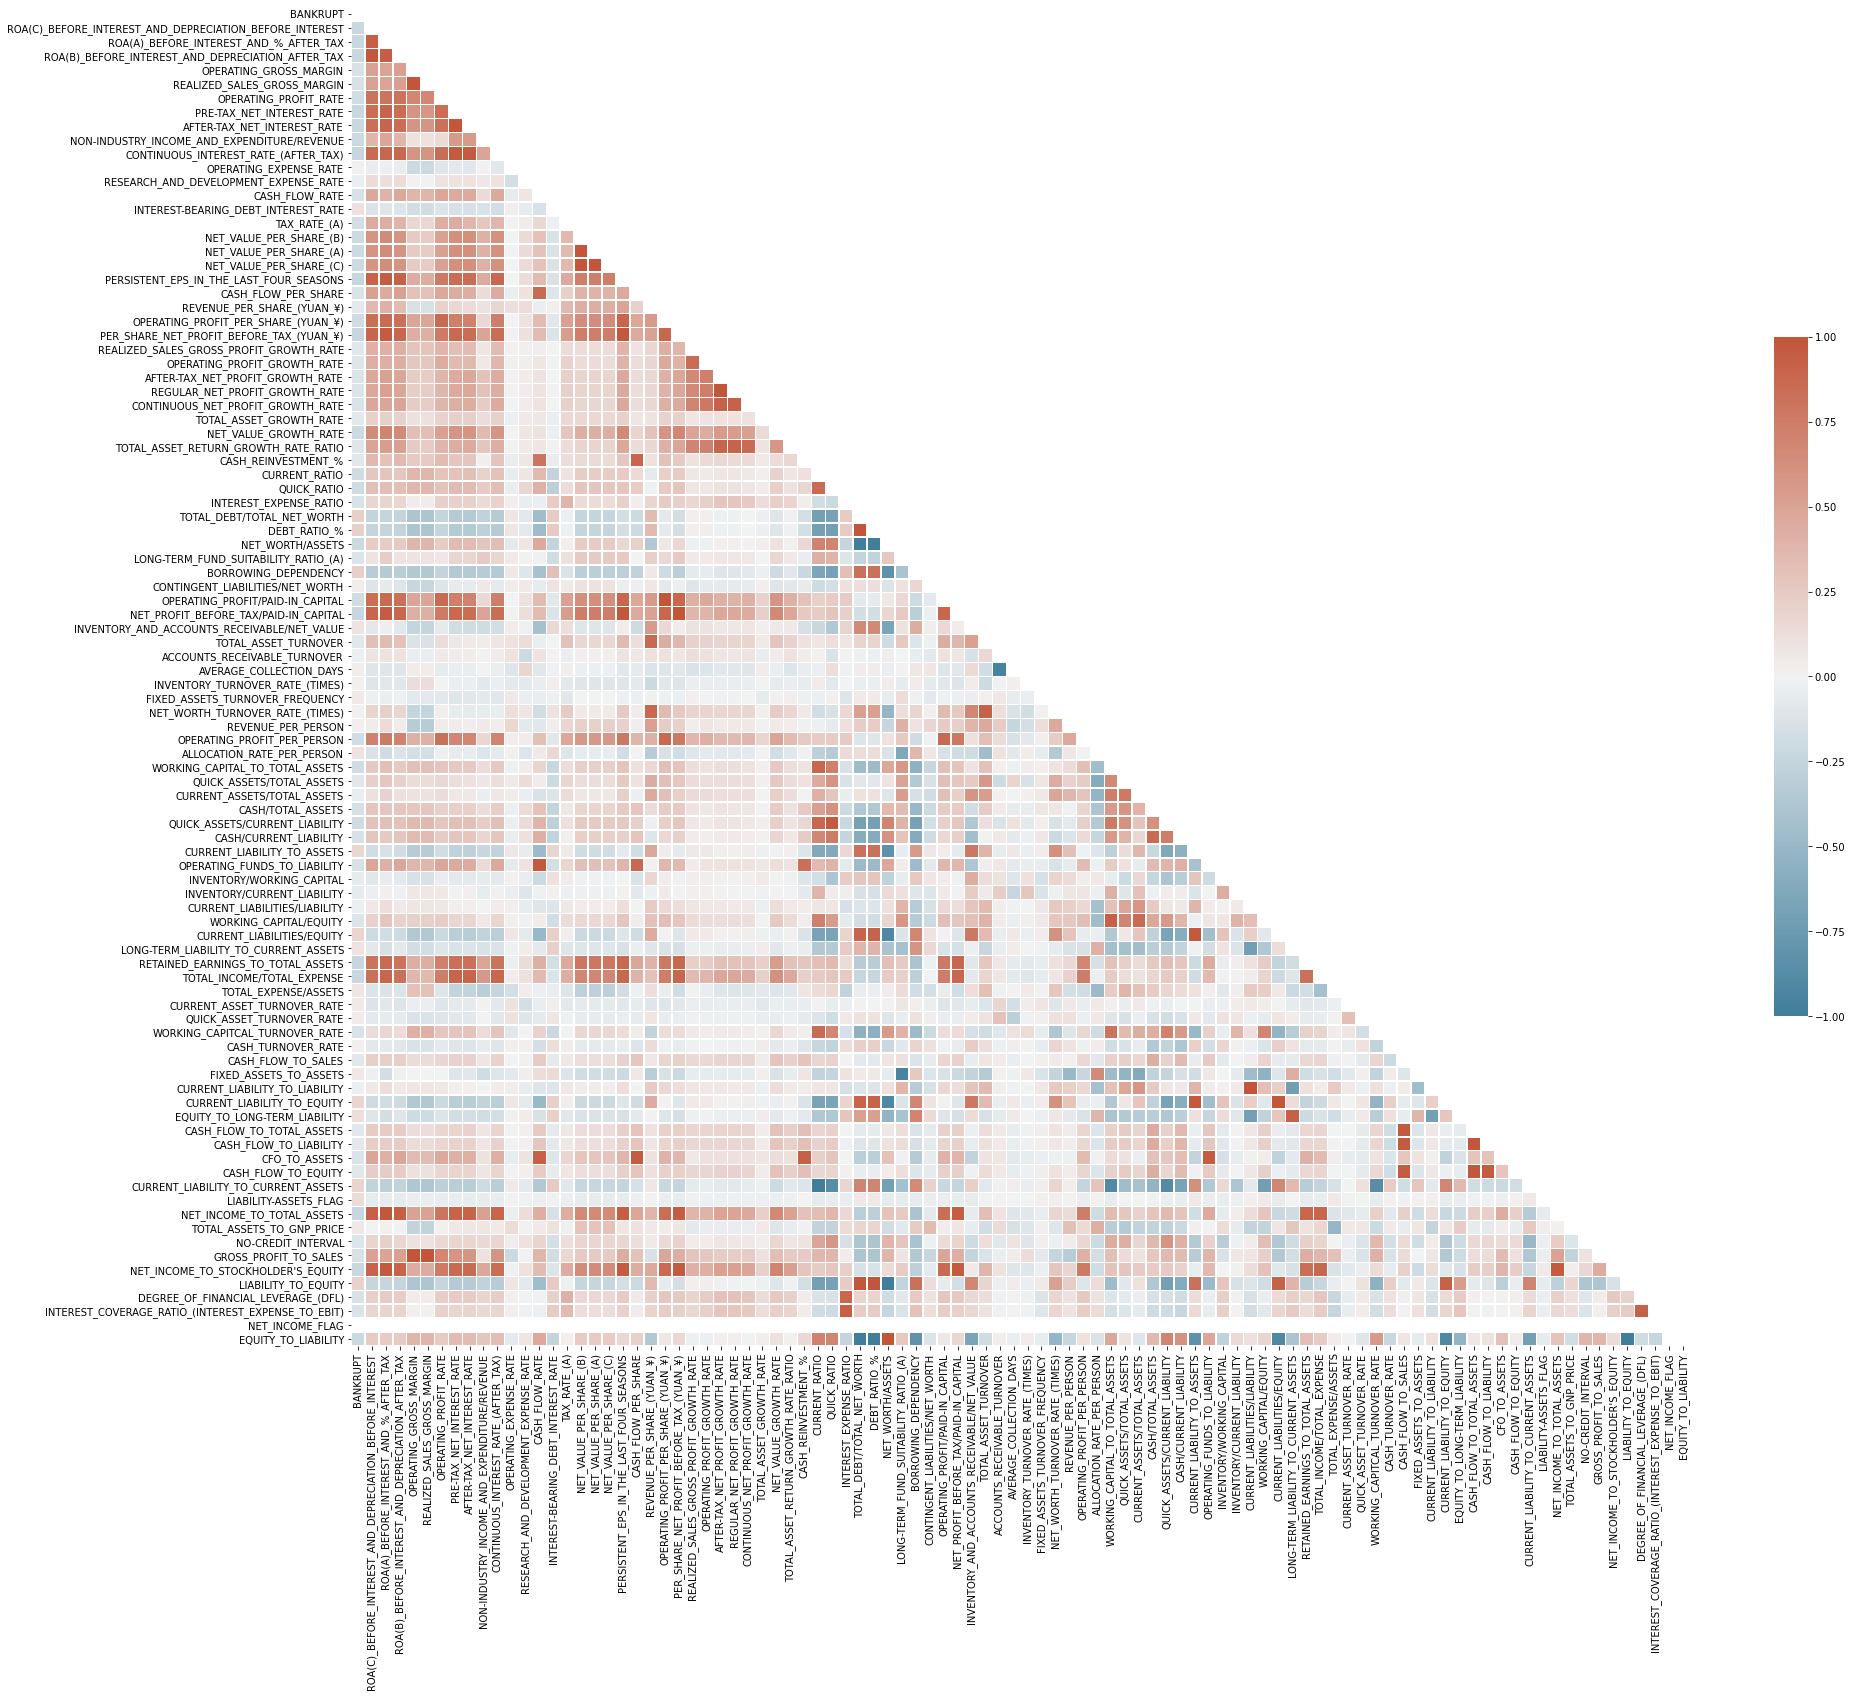

In [15]:
f, ax = plt.subplots(figsize=(30, 25))
df_corr = data.corr(method='spearman')
mask = np.triu(np.ones_like(df_corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(df_corr,mask=mask,cmap=cmap, vmax=1, center = 0, square=True, linewidth=0.5, cbar_kws={"shrink": .5})
plt.show()

### From the above Heatmap, it is clear that data contains highly correlated features. 
- This needs to be fixed to save processing time. 
- This can also make the model overfitted.
- This is required to stop the model else it will learn from the noise as well

In [16]:
# Spliting the data in input and output features
X = data.iloc[:,1:]
y = data.iloc[:,0]

In [17]:
X.shape, y.shape

((6819, 95), (6819,))

In [18]:
# Test train split 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print('Train: ', X_train.shape, y_train.shape)
print('Test: ', X_test.shape, y_test.shape)

Train:  (5455, 95) (5455,)
Test:  (1364, 95) (1364,)


### Feature Engineering
We will be performing the feature engineering separately for the test and train data to avoid data leakage.

In [21]:
# Checking for the highly Correlated columns
cor_matrix = X_train.corr().abs()
# print(cor_matrix)

Note that Correlation matrix will be mirror image about the diagonal and all the diagonal elements will be 1. So, It does not matter that we select the upper triangular or lower triangular part of the correlation matrix but we should not include the diagonal elements. So we are selecting the upper traingular.

In [22]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
#print(upper_tri)

So we are selecting the columns which are having absolute correlation greater than 0.95 and making a list of those columns named 'to_drop'.

In [23]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
print('Total column numbers: ',len(to_drop)); 
print(to_drop)

Total column numbers:  17
['ROA(B)_BEFORE_INTEREST_AND_DEPRECIATION_AFTER_TAX', 'REALIZED_SALES_GROSS_MARGIN', 'AFTER-TAX_NET_INTEREST_RATE', 'CONTINUOUS_INTEREST_RATE_(AFTER_TAX)', 'NET_VALUE_PER_SHARE_(A)', 'NET_VALUE_PER_SHARE_(C)', 'PER_SHARE_NET_PROFIT_BEFORE_TAX_(YUAN_¥)', 'REGULAR_NET_PROFIT_GROWTH_RATE', 'NET_WORTH/ASSETS', 'OPERATING_PROFIT/PAID-IN_CAPITAL', 'NET_PROFIT_BEFORE_TAX/PAID-IN_CAPITAL', 'CASH_FLOW_TO_SALES', 'CURRENT_LIABILITY_TO_LIABILITY', 'CURRENT_LIABILITY_TO_EQUITY', 'NET_INCOME_TO_TOTAL_ASSETS', 'GROSS_PROFIT_TO_SALES', 'LIABILITY_TO_EQUITY']


In [24]:
# Now we are droping the columns which are in the list 'to_drop' from the dataframe
X_train = X_train.drop(to_drop, axis=1)
X_test = X_test.drop(to_drop, axis=1)

print('Train: ', X_train.shape, y_train.shape)
print('Test: ', X_test.shape, y_test.shape)

Train:  (5455, 78) (5455,)
Test:  (1364, 78) (1364,)


### Checking for outliers in the data 

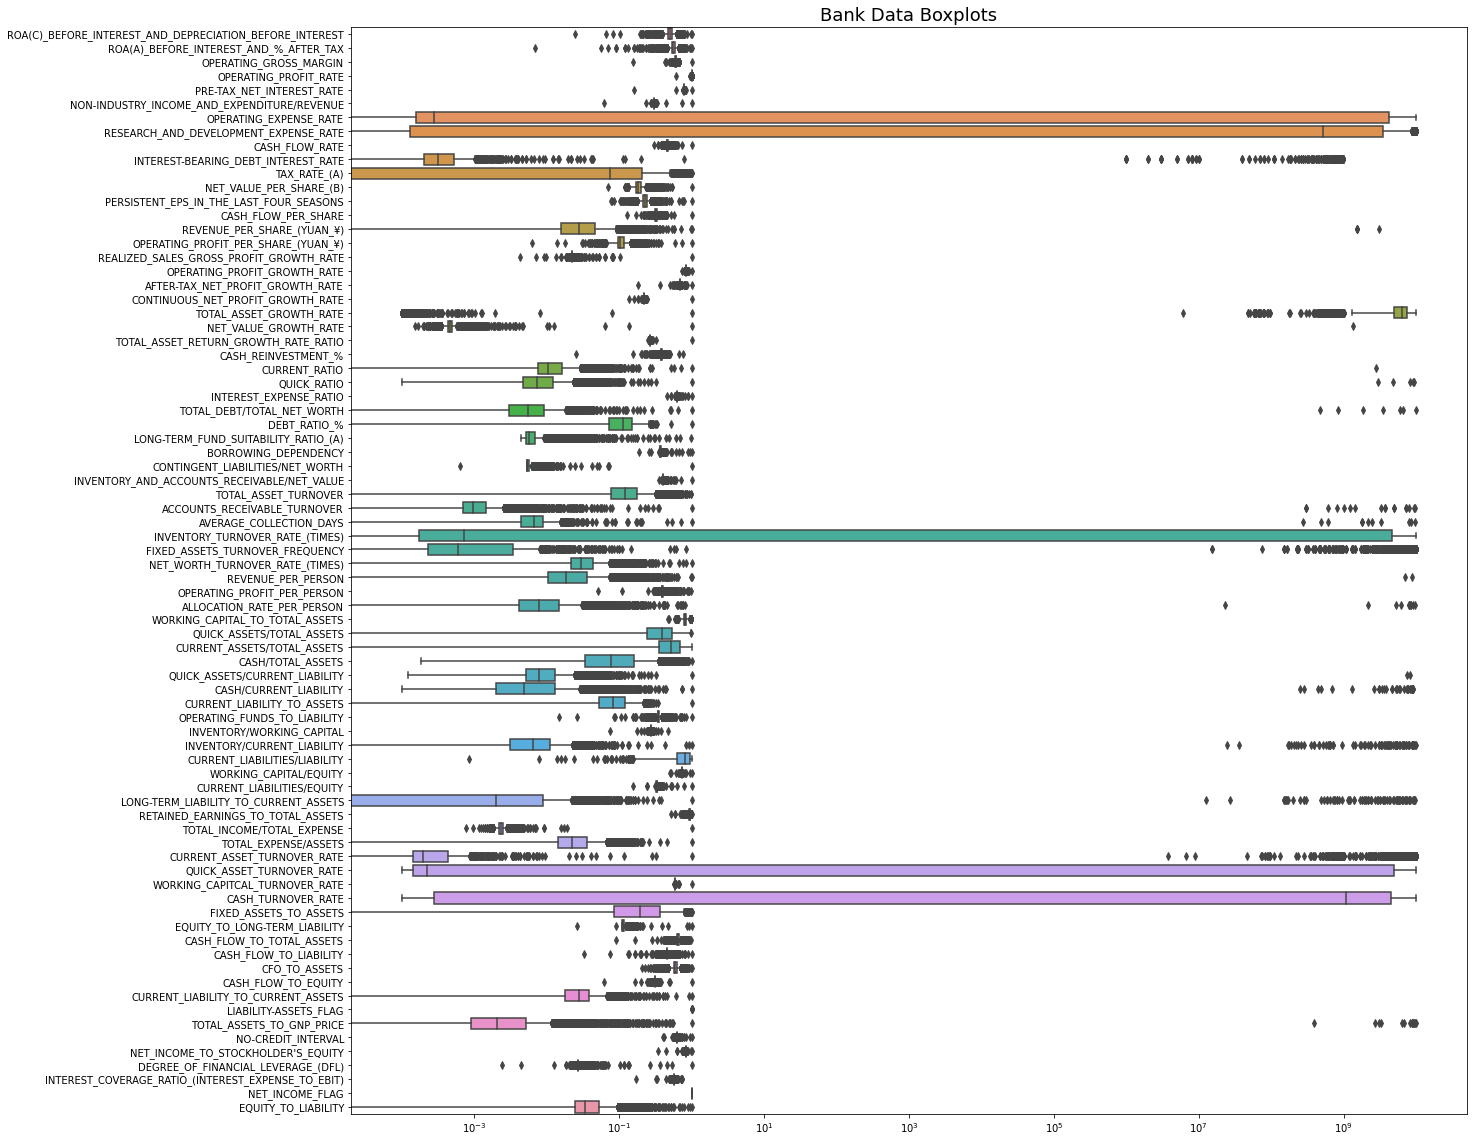

In [25]:
# Plotting Boxplots of the numerical features

plt.figure(figsize = (20,20))
ax =sns.boxplot(data = X_train, orient="h")
ax.set_title('Bank Data Boxplots', fontsize = 18)
ax.set(xscale="log")
plt.show()

Above graph proves that some features contains outliers in dataset 

#### Checking the important features using Mutual Information

https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html

In [26]:
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([0.03200427, 0.0324936 , 0.01212124, 0.01621045, 0.02691204,
       0.02311552, 0.        , 0.00109976, 0.01161726, 0.00057812,
       0.01928786, 0.03026624, 0.04021166, 0.00674639, 0.00105423,
       0.02009837, 0.00643584, 0.00279915, 0.01208658, 0.00979427,
       0.01138843, 0.03016257, 0.00820056, 0.00086725, 0.02070459,
       0.02111122, 0.03363808, 0.03223712, 0.03033323, 0.00977079,
       0.03469565, 0.00317064, 0.00427789, 0.00464599, 0.00103375,
       0.00385446, 0.        , 0.00063664, 0.00068956, 0.00050544,
       0.01750943, 0.00844896, 0.02127827, 0.00585749, 0.        ,
       0.01267185, 0.02052484, 0.00769016, 0.0181655 , 0.01349973,
       0.01589549, 0.        , 0.00138844, 0.02012045, 0.02350751,
       0.00291347, 0.02951912, 0.02804614, 0.00756054, 0.        ,
       0.00066131, 0.01212987, 0.00581712, 0.00067389, 0.00933547,
       0.00519453, 0.00856495, 0.00823713, 0.00921917, 0.02252267,
       0.00155065, 0.00224764, 0.00466872, 0.0376464 , 0.03144

In [33]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info_sorted = mutual_info.sort_values(ascending=False)
# mutual_info

In [32]:
mutual_info_sorted

PERSISTENT_EPS_IN_THE_LAST_FOUR_SEASONS    0.040212
NET_INCOME_TO_STOCKHOLDER'S_EQUITY         0.037646
BORROWING_DEPENDENCY                       0.034696
INTEREST_EXPENSE_RATIO                     0.033638
ROA(A)_BEFORE_INTEREST_AND_%_AFTER_TAX     0.032494
                                             ...   
OPERATING_EXPENSE_RATE                     0.000000
CURRENT_ASSET_TURNOVER_RATE                0.000000
CURRENT_ASSETS/TOTAL_ASSETS                0.000000
INVENTORY_TURNOVER_RATE_(TIMES)            0.000000
INVENTORY/CURRENT_LIABILITY                0.000000
Length: 78, dtype: float64

<AxesSubplot:>

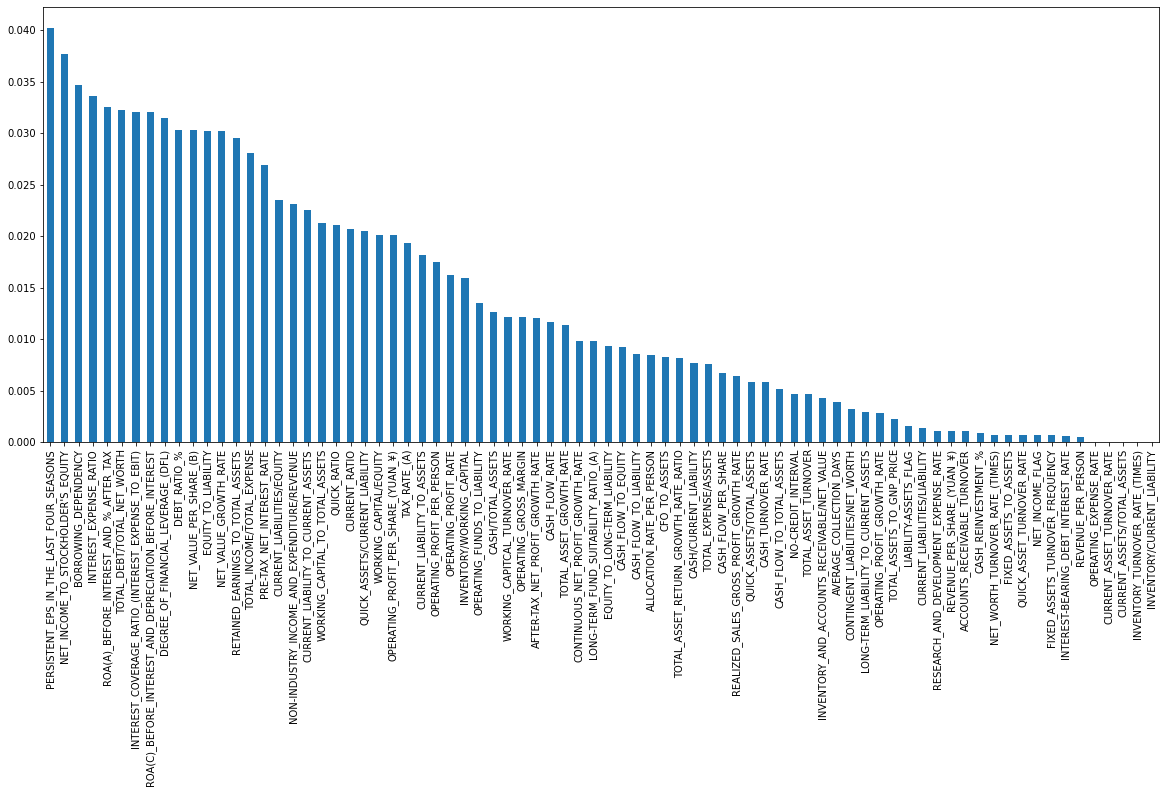

In [34]:
# Ploting Graph
mutual_info_sorted.plot.bar(figsize=(20,8))

#### In the above graph, we can clearly see that their are few features in the data which are not important and can be dropped. 

### To select important features
We will be using SelectKBest to select the important features.

https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html

In [60]:
from sklearn.feature_selection import SelectKBest

best_features = SelectKBest(mutual_info_classif, k=50)
best_features.fit(X_train, y_train)
top_features = X_train.columns[best_features.get_support()]
top_features

Index(['ROA(C)_BEFORE_INTEREST_AND_DEPRECIATION_BEFORE_INTEREST',
       'ROA(A)_BEFORE_INTEREST_AND_%_AFTER_TAX', 'OPERATING_GROSS_MARGIN',
       'OPERATING_PROFIT_RATE', 'PRE-TAX_NET_INTEREST_RATE',
       'NON-INDUSTRY_INCOME_AND_EXPENDITURE/REVENUE', 'CASH_FLOW_RATE',
       'TAX_RATE_(A)', 'NET_VALUE_PER_SHARE_(B)',
       'PERSISTENT_EPS_IN_THE_LAST_FOUR_SEASONS', 'CASH_FLOW_PER_SHARE',
       'OPERATING_PROFIT_PER_SHARE_(YUAN_¥)',
       'REALIZED_SALES_GROSS_PROFIT_GROWTH_RATE',
       'AFTER-TAX_NET_PROFIT_GROWTH_RATE', 'CONTINUOUS_NET_PROFIT_GROWTH_RATE',
       'TOTAL_ASSET_GROWTH_RATE', 'NET_VALUE_GROWTH_RATE',
       'TOTAL_ASSET_RETURN_GROWTH_RATE_RATIO', 'CURRENT_RATIO', 'QUICK_RATIO',
       'INTEREST_EXPENSE_RATIO', 'TOTAL_DEBT/TOTAL_NET_WORTH', 'DEBT_RATIO_%',
       'LONG-TERM_FUND_SUITABILITY_RATIO_(A)', 'BORROWING_DEPENDENCY',
       'OPERATING_PROFIT_PER_PERSON', 'ALLOCATION_RATE_PER_PERSON',
       'WORKING_CAPITAL_TO_TOTAL_ASSETS', 'QUICK_ASSETS/TOTAL_ASSETS',


In [62]:
X_train_top = best_features.transform(X_train)
X_test_top = best_features.transform(X_test)

# Coverting to DataFrame
X_train_top = pd.DataFrame(X_train_top, columns=top_features)
X_test_top = pd.DataFrame(X_test_top, columns=top_features)

#### To plot the pairplot on top 10 fetures

In [31]:
best_features_10 = SelectKBest(mutual_info_classif, k=10)
best_features_10.fit(X_train, y_train)
top_features_10 = X_train.columns[best_features_10.get_support()]

data_sample = pd.DataFrame(data= data, columns=top_features_10)
data_sample = pd.concat([data_sample,y], axis=1)
data_sample.shape, data.shape

((6819, 11), (6819, 96))

In [116]:
data_sample.columns

Index(['ROA(C)_BEFORE_INTEREST_AND_DEPRECIATION_BEFORE_INTEREST',
       'ROA(A)_BEFORE_INTEREST_AND_%_AFTER_TAX',
       'PERSISTENT_EPS_IN_THE_LAST_FOUR_SEASONS', 'INTEREST_EXPENSE_RATIO',
       'DEBT_RATIO_%', 'BORROWING_DEPENDENCY',
       'NET_INCOME_TO_STOCKHOLDER'S_EQUITY',
       'DEGREE_OF_FINANCIAL_LEVERAGE_(DFL)',
       'INTEREST_COVERAGE_RATIO_(INTEREST_EXPENSE_TO_EBIT)',
       'EQUITY_TO_LIABILITY', 'BANKRUPT'],
      dtype='object')

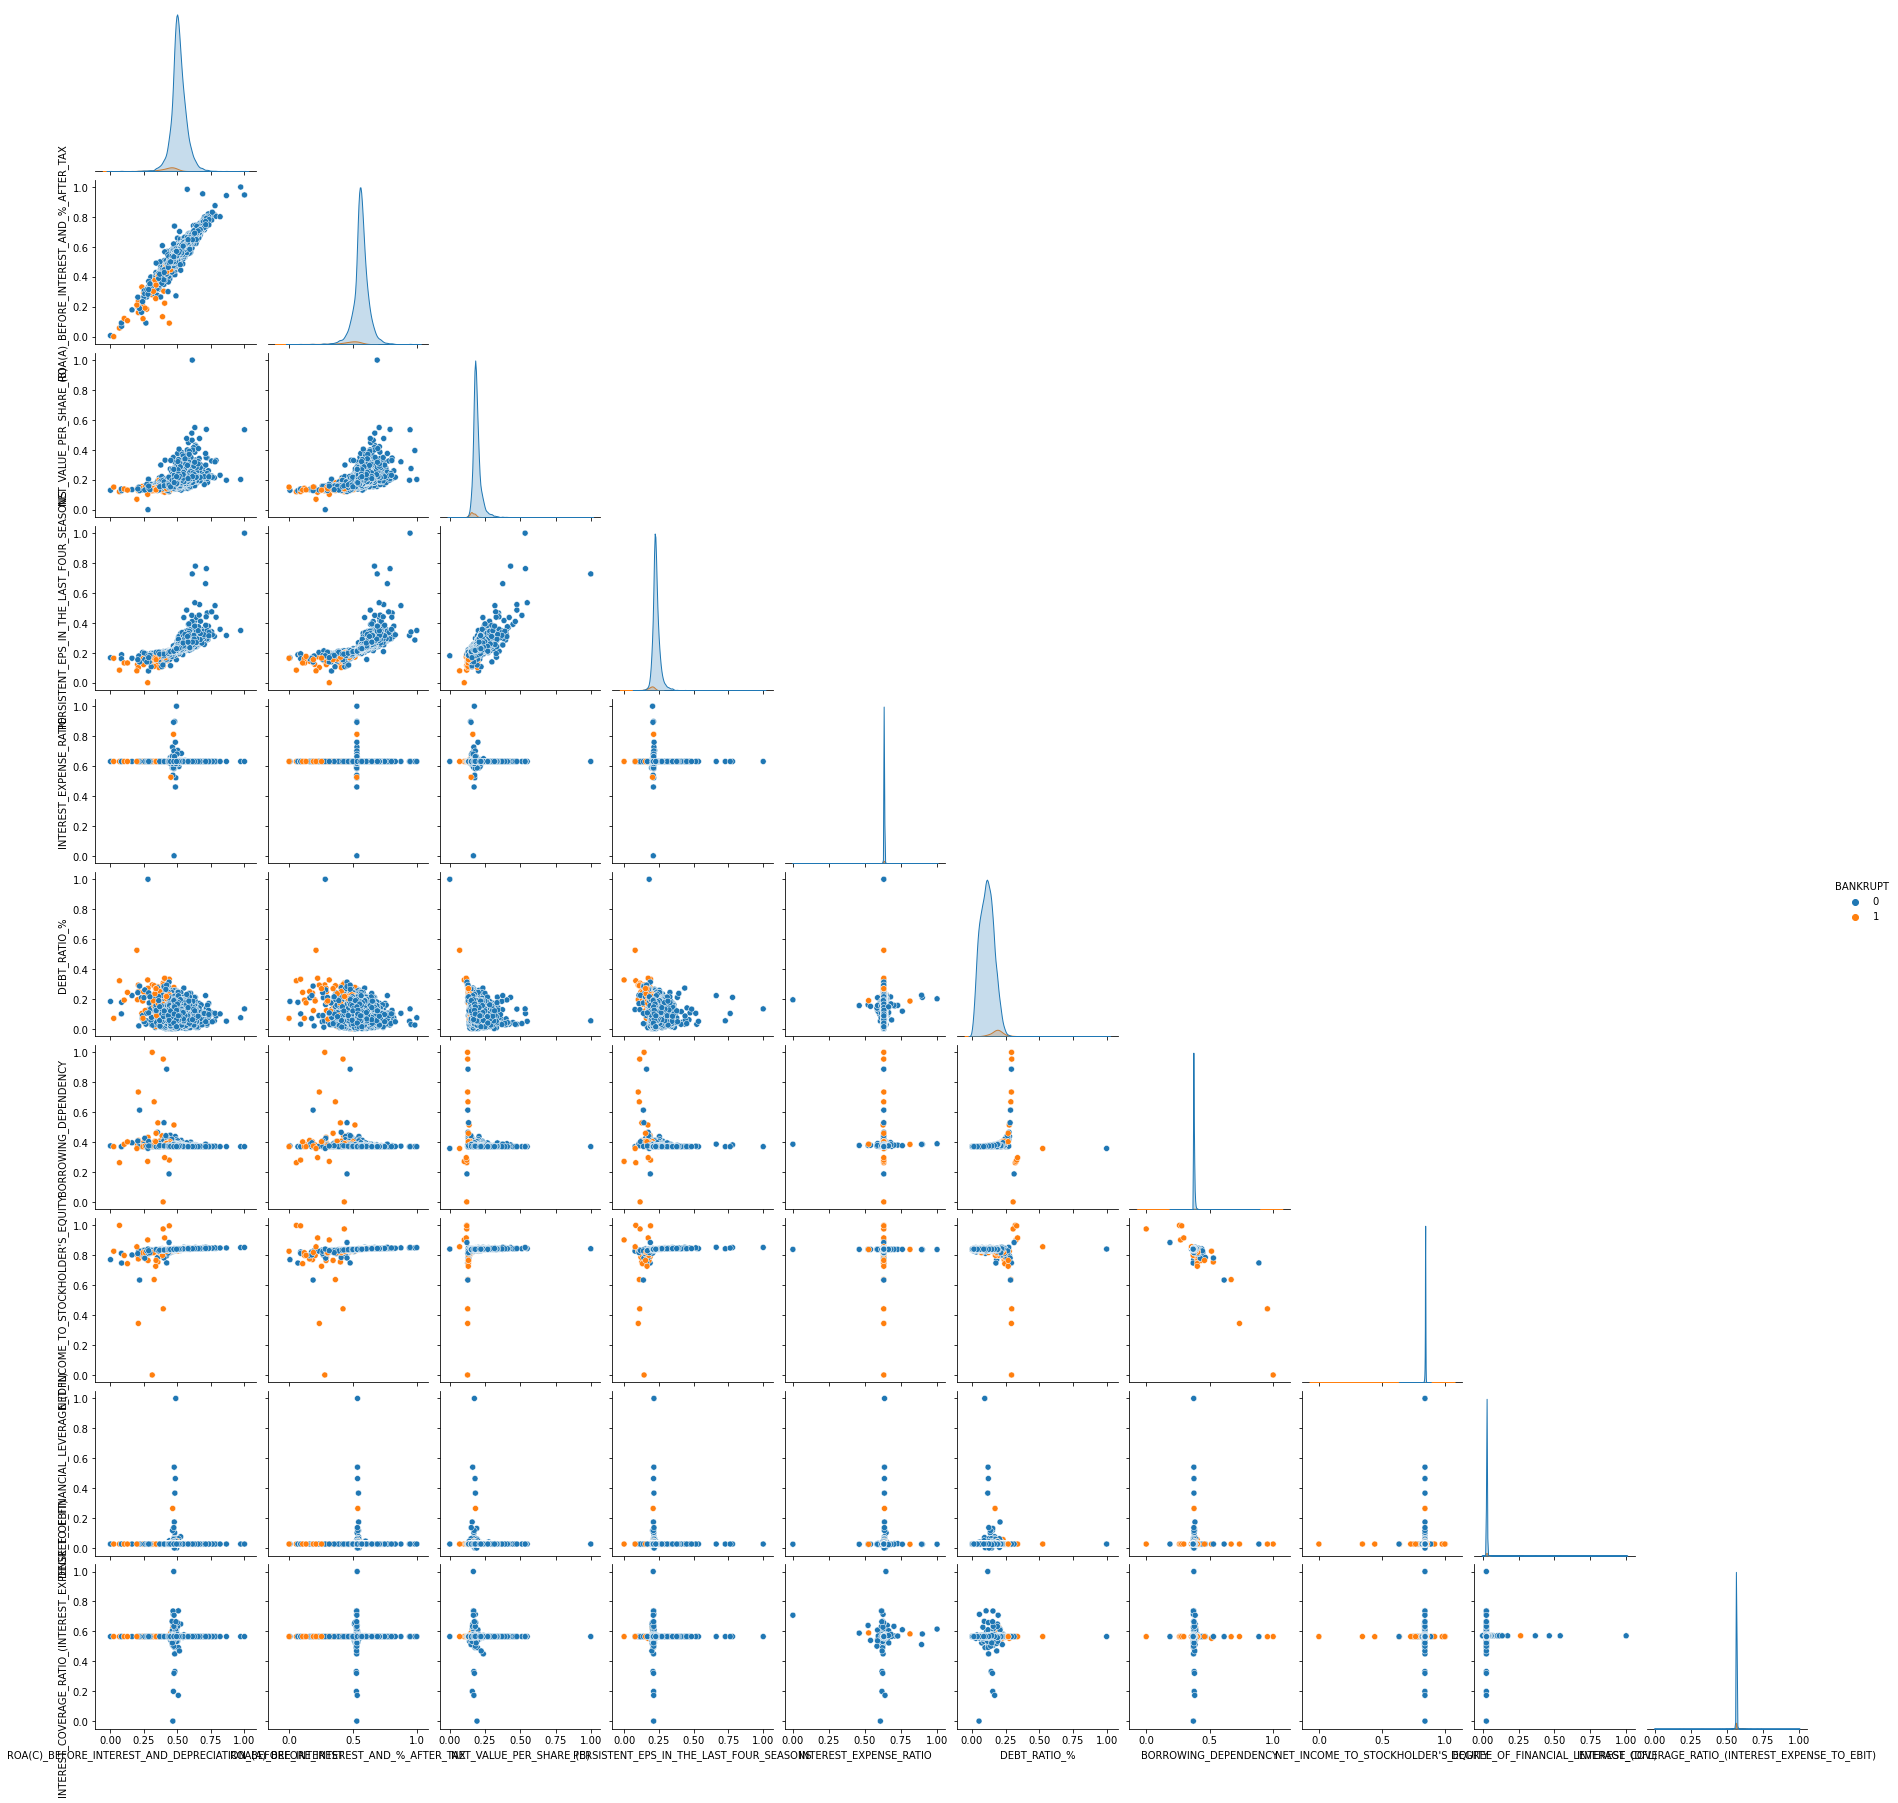

In [50]:
sns.pairplot(data_sample, hue='BANKRUPT', corner=True)

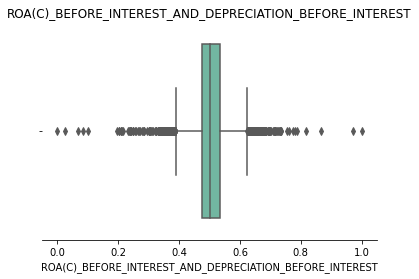

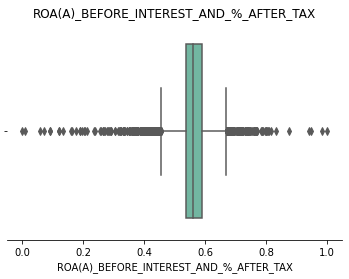

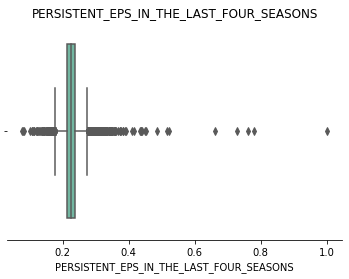

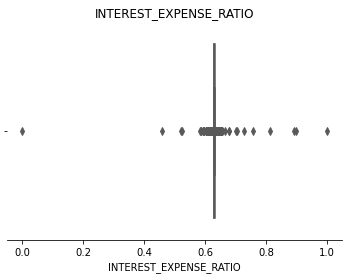

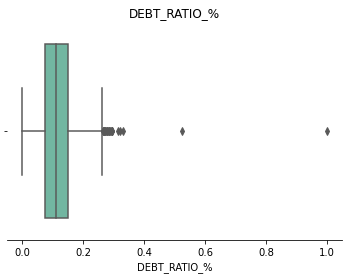

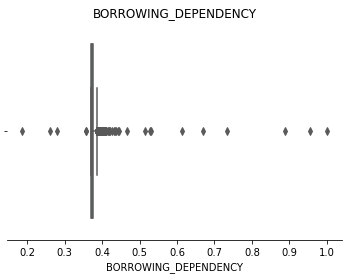

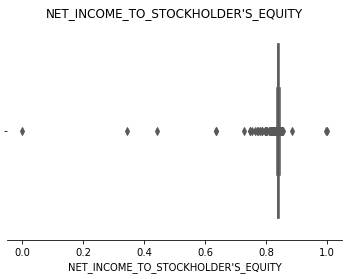

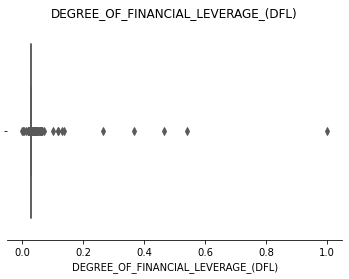

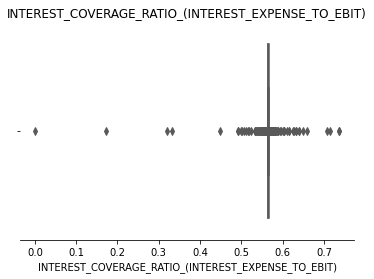

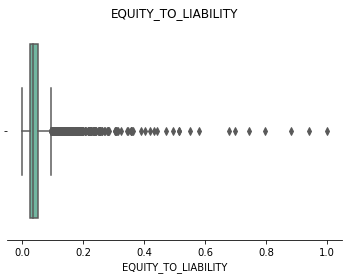

In [117]:
#plt.figure(figsize=(14,20))
for i, col in enumerate(top_features_10):
    #plt.subplot(10,2,i+1)
    sns.set_palette('Set2')
    ax = sns.boxplot(x = col, data = X_train)
    sns.despine(top=True,right=True,left=True)
    plt.title(col.upper())
    plt.show()

From the above grapgh it is clear that the data contains outliers and it also contains skewness but in the real data will contains outliers. Hence, we are not performing any treatment for this.

### Outliers removal 

In [118]:
# Outliers removal steps 
# Function Definition

# def outliers_removal(feature,feature_name,dataset):
    
#     # Identify 25th & 75th quartiles

#     q25, q75 = np.percentile(feature, 25), np.percentile(feature, 75)
#     print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
#     feat_iqr = q75 - q25
#     print('iqr: {}'.format(feat_iqr))
    
#     feat_cut_off = feat_iqr * 1.5
#     feat_lower, feat_upper = q25 - feat_cut_off, q75 + feat_cut_off
#     print('Cut Off: {}'.format(feat_cut_off))
#     print(feature_name +' Lower: {}'.format(feat_lower))
#     print(feature_name +' Upper: {}'.format(feat_upper))
    
#     outliers = [x for x in feature if x < feat_lower or x > feat_upper]
#     print(feature_name + ' outliers for close to bankruptcy cases: {}'.format(len(outliers)))
#     #print(feature_name + ' outliers:{}'.format(outliers))

#     dataset = dataset.drop(dataset[(dataset[feature_name] > feat_upper) | (dataset[feature_name] < feat_lower)].index)
#     print('-' * 65)
    
#     return dataset

In [119]:
# for col in X_train:
#     Data_Out = outliers_removal(X_train[col],str(col),data)

In [120]:
# After Removing Outliers
# plt.figure(figsize = (20,20))
# ax =sns.boxplot(data = X_train, orient="h")
# ax.set_title('Bank Data Boxplots', fontsize = 18)
# ax.set(xscale="log")
# plt.show()

### SMOTE
Let's see if using SMOTE as oversampling technique can help us improving the performance. Although it is likely that SMOTE will be more accurate than random under-sampling, it will take more time to train since no rows are eliminated as previously stated.

### MODELING
Now, let's see what we can do with our models! We will see the performances on the cleaned undersampled data and on the SMOTE oversampled data. For this part I decided to use a few different models:
- Logistic Regression
- KNN
- Random Forest Classifier
- XGBOOST
- CatBoost Classifier

## Logistic Regression

In [33]:
# Applying Stander scaler, since we are using Logistic Regression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train,y_train)

X_train_sd = scaler.fit_transform(X_train_top)
X_test_sd = scaler.transform(X_test_top)

In [63]:
# Using Normalization to get a normally distributed data for Logistic Regression
from sklearn.preprocessing import Normalizer

norm = Normalizer().fit(X_train_sd)
X_train_sd = norm.fit_transform(X_train_sd)
X_test_sd = norm.transform(X_test_sd)

# Coverting to DataFrame
X_train_sd = pd.DataFrame(X_train_sd)
X_test_sd = pd.DataFrame(X_test_sd)

In [35]:
# Importing required matrics libraries
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Importing Random search 
from sklearn.model_selection import RandomizedSearchCV

In [36]:
# Importing Logistic Regression
from sklearn.linear_model import LogisticRegression

In [37]:
# Defining param values
log_reg_params = {'penalty': ['l2','l1'],
                  'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                  'class_weight': ['balanced',None],
                  'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

In [38]:
# Randomized search Cv initialization
log_reg = LogisticRegression()
rand_logestic_reg = RandomizedSearchCV(log_reg, log_reg_params, n_iter=4)

In [39]:
def model_train(model_name, X_train, y_train, model_classifier):
    
    # Importing the required libralies
    from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
    from imblearn.over_sampling import SMOTE
    from sklearn.model_selection import StratifiedKFold
    
    # printing model name
    print('********************************* Model : {} *********************************\n'.format(model_name.upper()))
    
    # Initializing empty lists
    accuracy_lst = []
    precision_lst = []
    recall_lst = []
    f1_lst = []
    auc_lst = []
    
    sss = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
    
    # model training
    i = 1
    for train_index, test_index in sss.split(X_train,y_train):
        print('{} of KFold {}'.format(i,sss.n_splits))
        X_train_sm, X_test_sm = X_train.iloc[train_index], X_train.iloc[test_index]
        y_train_sm, y_test_sm = y_train.iloc[train_index], y_train.iloc[test_index]

        pipeline_reg = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), model_classifier) # SMOTE happens during Cross Validation not before..
        model_reg = pipeline_reg.fit(X_train_sm, y_train_sm)
        best_est_reg = model_classifier.best_estimator_
        prediction_reg = best_est_reg.predict(X_train_sm)
        
        # printing score
        print('score: ',pipeline_reg.score(X_train_sm, y_train_sm))
        print('precision_score: ',precision_score(y_train_sm, prediction_reg))
        print('recall_score: ',recall_score(y_train_sm, prediction_reg))
        print('f1_score: ',f1_score(y_train_sm, prediction_reg))
        print('roc_auc_score: ',roc_auc_score(y_train_sm, prediction_reg))
        print('---' * 35)

        accuracy_lst.append(pipeline_reg.score(X_train_sm, y_train_sm))
        precision_lst.append(precision_score(y_train_sm, prediction_reg))
        recall_lst.append(recall_score(y_train_sm, prediction_reg))
        f1_lst.append(f1_score(y_train_sm, prediction_reg))
        auc_lst.append(roc_auc_score(y_train_sm, prediction_reg))
        i = i+1
    
    # printing mean score of all
    print('###' * 35)
    print("accuracy_mean: {}".format(np.mean(accuracy_lst)))
    print("precision_mean: {}".format(np.mean(precision_lst)))
    print("recall_mean: {}".format(np.mean(recall_lst)))
    print("f1_score_mean: {}".format(np.mean(f1_lst)))
    print('')
    
    return best_est_reg, X_test_sm, y_test_sm, X_train_sm, y_train_sm

In [40]:
trained_logistic_reg, X_test_sm, y_test_sm, X_train_sm, y_train_sm = model_train('Logistic Regression', X_train_sd, y_train, rand_logestic_reg)

********************************* Model : LOGISTIC REGRESSION *********************************

1 of KFold 5
score:  0.8709899175068744
precision_score:  0.17894736842105263
recall_score:  0.875
f1_score:  0.2971285892634207
roc_auc_score:  0.8729304635761589
---------------------------------------------------------------------------------------------------------
2 of KFold 5
score:  0.8389092575618698
precision_score:  0.14411027568922305
recall_score:  0.8518518518518519
f1_score:  0.2465166130760986
roc_auc_score:  0.8451739751101303
---------------------------------------------------------------------------------------------------------
3 of KFold 5
score:  0.8696150320806599
precision_score:  0.17319277108433734
recall_score:  0.8518518518518519
f1_score:  0.2878598247809762
roc_auc_score:  0.8610169639963918
---------------------------------------------------------------------------------------------------------
4 of KFold 5
score:  0.8824472960586618
precision_score:  0.1941747

In [41]:
# Printing the clasification Report 
def classification_report(best_est_model, X_test, y_test):
    from sklearn.metrics import classification_report

    label = ['Fin_Stable', 'Fin_Unstable']
    pred_reg_sm = best_est_model.predict(X_test)
    print(classification_report(y_test, pred_reg_sm, target_names=label))

In [42]:
classification_report(trained_logistic_reg, X_test_sm, y_test_sm)

              precision    recall  f1-score   support

  Fin_Stable       0.99      0.86      0.92      1057
Fin_Unstable       0.16      0.79      0.26        34

    accuracy                           0.86      1091
   macro avg       0.58      0.83      0.59      1091
weighted avg       0.97      0.86      0.90      1091



In [43]:
# Plotting Confusion Mtrics
def confusion_matrics(best_est_model, X_test, y_test):
    pred_reg_sm = best_est_model.predict(X_test)
    cm = confusion_matrix(y_test, pred_reg_sm) 
    
#     plt.figure(figsize=(10,8))
    f, ax = plt.subplots(1, 2, figsize=(20,8))

    sns.heatmap(cm/np.sum(cm), annot=True, cmap='Blues', fmt='.2%', ax = ax[0])
    ax[0].set_title('Percentage Matrics')
    ax[0].set_ylabel('Actual Values')
    ax[0].set_xlabel('Predicted Values ')
    
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g',ax = ax[1])
    ax[1].set_title('Count Matrics')
    ax[1].set_ylabel('Actual Values')
    ax[1].set_xlabel('Predicted Values ')  
   

    ## Ticket labels - List must be in alphabetical order
#     ax.xaxis.set_ticklabels(['Actual_Fin_Stable','Actual_Fin_UnStable'])
#     ax.yaxis.set_ticklabels(['Predicted_Fin_Stable','Predicted_Fin_UnStable'])

    ## Display the visualization of the Confusion Matrix.
    plt.show()

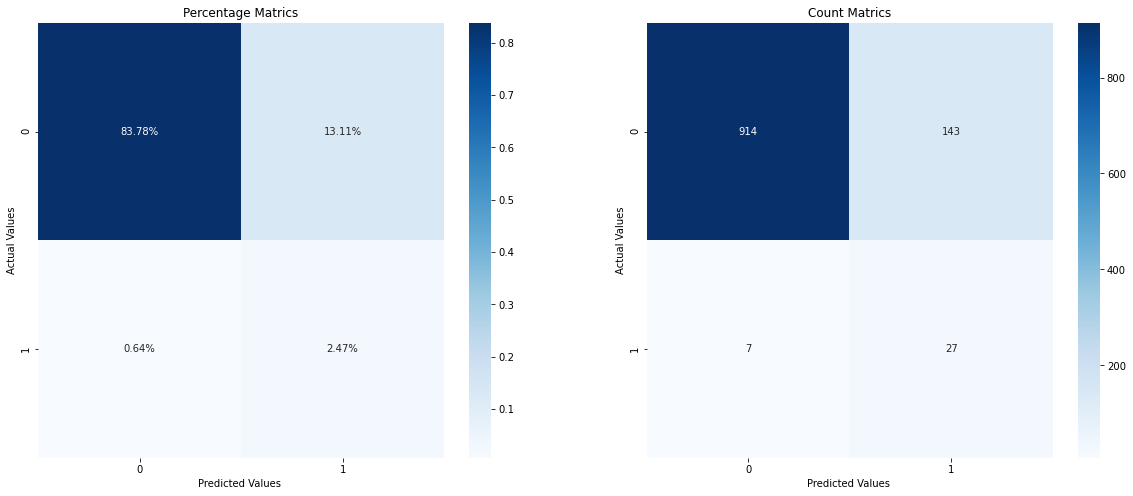

In [44]:
confusion_matrics(trained_logistic_reg, X_test_sm, y_test_sm)

## Random Forest Classifier 

In [64]:
# Importing important libraries
from sklearn.ensemble import RandomForestClassifier

In [65]:
rfc_sm = RandomForestClassifier()
# defining parameter values
rfc_params = {'max_features' : ['auto', 'sqrt', 'log2'],
              'random_state' : [42],
              'class_weight' : ['balanced','balanced_subsample'],
              'criterion' : ['gini', 'entropy'],
              'bootstrap' : [True,False]}

In [66]:
rand_forest = RandomizedSearchCV(rfc_sm, rfc_params, n_iter=4)

In [67]:
trained_random_forest, X_test_sm, y_test_sm, X_train_sm, y_train_sm = model_train('Random Forest', X_train_top, y_train, rand_forest)

********************************* Model : RANDOM FOREST *********************************

1 of KFold 5
score:  1.0
precision_score:  1.0
recall_score:  1.0
f1_score:  1.0
roc_auc_score:  1.0
---------------------------------------------------------------------------------------------------------
2 of KFold 5
score:  1.0
precision_score:  1.0
recall_score:  1.0
f1_score:  1.0
roc_auc_score:  1.0
---------------------------------------------------------------------------------------------------------
3 of KFold 5
score:  1.0
precision_score:  1.0
recall_score:  1.0
f1_score:  1.0
roc_auc_score:  1.0
---------------------------------------------------------------------------------------------------------
4 of KFold 5
score:  1.0
precision_score:  1.0
recall_score:  1.0
f1_score:  1.0
roc_auc_score:  1.0
---------------------------------------------------------------------------------------------------------
5 of KFold 5
score:  1.0
precision_score:  1.0
recall_score:  1.0
f1_score:  1.0


In [68]:
classification_report(trained_random_forest, X_test_sm, y_test_sm)

              precision    recall  f1-score   support

  Fin_Stable       0.98      0.98      0.98      1057
Fin_Unstable       0.45      0.50      0.47        34

    accuracy                           0.97      1091
   macro avg       0.72      0.74      0.73      1091
weighted avg       0.97      0.97      0.97      1091



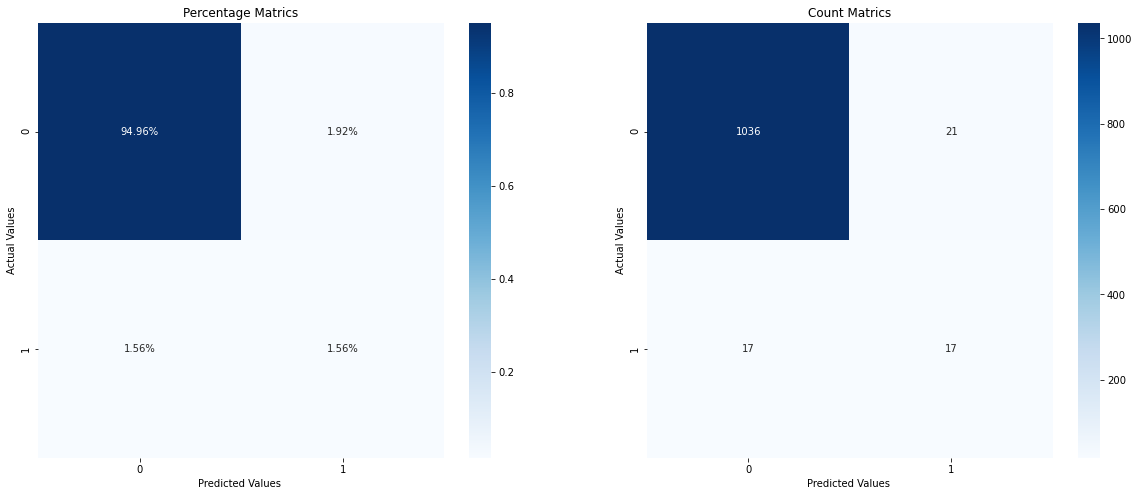

In [69]:
confusion_matrics(trained_random_forest, X_test_sm, y_test_sm)

## XGBOOST

In [70]:
# Importing XGBoost classifier
import xgboost as xgb

xgb_sm = xgb.XGBClassifier(random_state = 42)

In [71]:
# Defining parameter values
xgb_params = {'eta' : [0.1,0.01,0.001],  # Learning rate
              'eval_metric': ['logloss'],
              'max_depth' : [3,6,9],
              'lambda' : [1,1.5,2],      # L2 regularization (higher values make model more conservative)
              'alpha' : [0,0.5,1]}        # L1 regularization (higher values make model more conservative)

In [72]:
rand_xgboost = RandomizedSearchCV(xgb_sm, xgb_params, n_iter=4)

In [73]:
trained_xgboost, X_test_sm, y_test_sm, X_train_sm, y_train_sm = model_train('XGBOOST', X_train_top, y_train, rand_xgboost)

********************************* Model : XGBOOST *********************************

1 of KFold 5
score:  1.0
precision_score:  1.0
recall_score:  1.0
f1_score:  1.0
roc_auc_score:  1.0
---------------------------------------------------------------------------------------------------------
2 of KFold 5
score:  0.999083409715857
precision_score:  0.9712230215827338
recall_score:  1.0
f1_score:  0.9854014598540146
roc_auc_score:  0.999527074958619
---------------------------------------------------------------------------------------------------------
3 of KFold 5
score:  0.9667736021998167
precision_score:  0.48175182481751827
recall_score:  0.9777777777777777
f1_score:  0.645476772616137
roc_auc_score:  0.9721000499198656
---------------------------------------------------------------------------------------------------------
4 of KFold 5
score:  1.0
precision_score:  1.0
recall_score:  1.0
f1_score:  1.0
roc_auc_score:  1.0
------------------------------------------------------------

In [74]:
classification_report(trained_xgboost, X_test_sm, y_test_sm)

              precision    recall  f1-score   support

  Fin_Stable       0.98      0.97      0.98      1057
Fin_Unstable       0.34      0.53      0.41        34

    accuracy                           0.95      1091
   macro avg       0.66      0.75      0.69      1091
weighted avg       0.96      0.95      0.96      1091



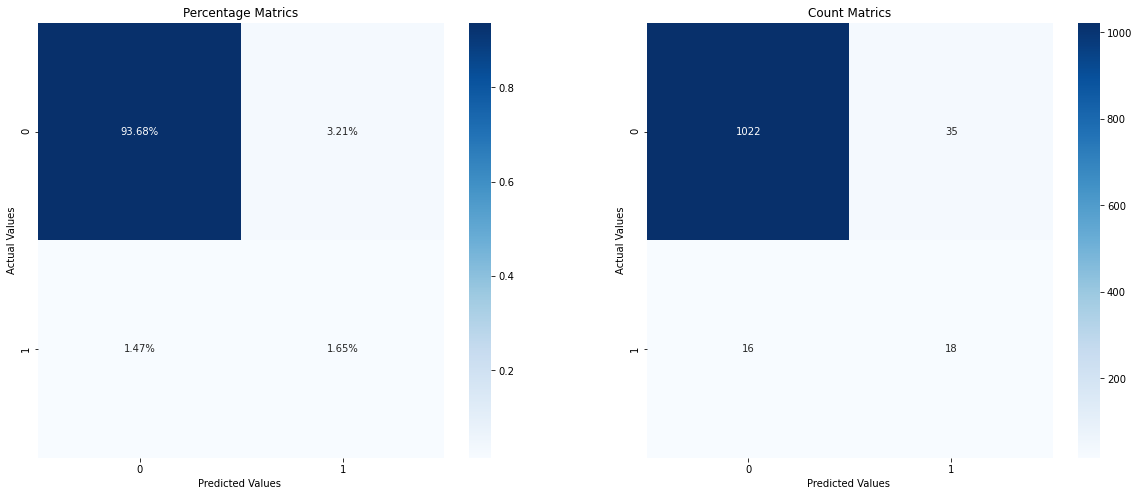

In [75]:
confusion_matrics(trained_xgboost, X_test_sm, y_test_sm)

## CATBOOST

In [76]:
# Importing catboost
from catboost import CatBoostClassifier

cat_sm = CatBoostClassifier(verbose = 0)

In [77]:
cat_params = {'eval_metric': ['F1'],
              'iterations': [100,500,1000],
              'learning_rate' : [0.1,0.01,0.001],
              'random_seed' : [42],
              'auto_class_weights' : ['Balanced','SqrtBalanced']
             }

In [78]:
rand_catboost = RandomizedSearchCV(cat_sm, cat_params, n_iter=4)

In [79]:
trained_catboost, X_test_sm, y_test_sm, X_train_sm, y_train_sm = model_train('rand_cat', X_train_top, y_train, rand_catboost)

********************************* Model : RAND_CAT *********************************

1 of KFold 5
score:  0.9841888175985335
precision_score:  0.6650246305418719
recall_score:  0.9926470588235294
f1_score:  0.7964601769911503
roc_auc_score:  0.9882819021648395
---------------------------------------------------------------------------------------------------------
2 of KFold 5
score:  0.9816681943171403
precision_score:  0.6291079812206573
recall_score:  0.9925925925925926
f1_score:  0.7701149425287356
roc_auc_score:  0.9869560267290227
---------------------------------------------------------------------------------------------------------
3 of KFold 5
score:  1.0
precision_score:  1.0
recall_score:  1.0
f1_score:  1.0
roc_auc_score:  1.0
---------------------------------------------------------------------------------------------------------
4 of KFold 5
score:  1.0
precision_score:  1.0
recall_score:  1.0
f1_score:  1.0
roc_auc_score:  1.0
------------------------------------------

In [80]:
classification_report(trained_catboost, X_test_sm, y_test_sm)

              precision    recall  f1-score   support

  Fin_Stable       0.98      0.96      0.97      1057
Fin_Unstable       0.28      0.50      0.36        34

    accuracy                           0.94      1091
   macro avg       0.63      0.73      0.66      1091
weighted avg       0.96      0.94      0.95      1091



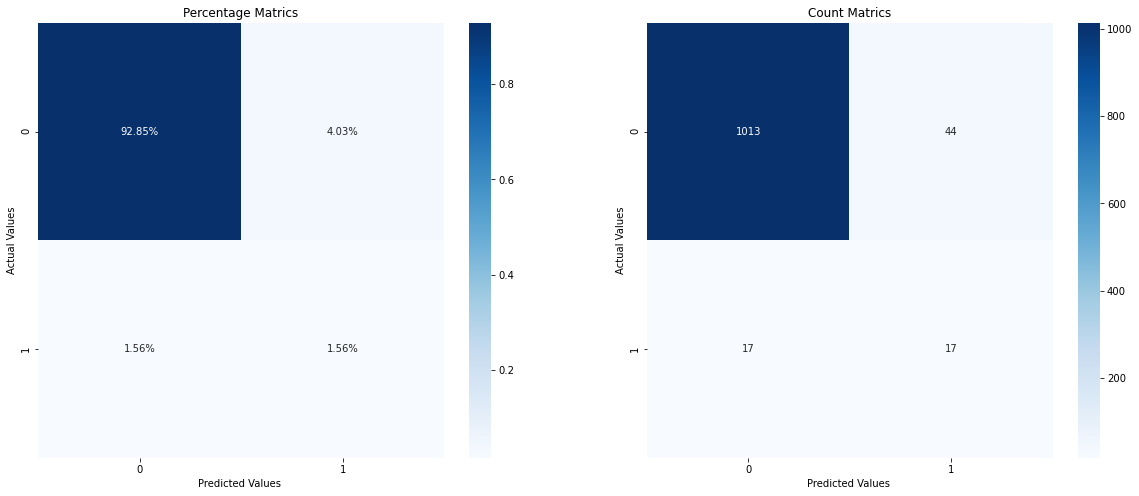

In [81]:
confusion_matrics(trained_catboost, X_test_sm, y_test_sm)

## KNN

In [82]:
from sklearn.neighbors import KNeighborsClassifier

In [83]:
knn = KNeighborsClassifier()
from sklearn.model_selection import RandomizedSearchCV
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)

In [84]:
# defining parameter range
rand_knn = RandomizedSearchCV(knn, param_grid, n_iter=4)

In [85]:
trained_rand_knn, X_test_sm, y_test_sm, X_train_sm, y_train_sm = model_train('KNN', X_train_top, y_train, rand_knn)

********************************* Model : KNN *********************************

1 of KFold 5
score:  0.9106324472960586
precision_score:  0.18090452261306533
recall_score:  0.5294117647058824
f1_score:  0.26966292134831465
roc_auc_score:  0.7261533752573877
---------------------------------------------------------------------------------------------------------
2 of KFold 5
score:  0.9580659945004583
precision_score:  0.35185185185185186
recall_score:  0.4222222222222222
f1_score:  0.3838383838383838
roc_auc_score:  0.6986968287748615
---------------------------------------------------------------------------------------------------------
3 of KFold 5
score:  0.9670027497708524
precision_score:  0.4645669291338583
recall_score:  0.43703703703703706
f1_score:  0.450381679389313
roc_auc_score:  0.7104787928150426
---------------------------------------------------------------------------------------------------------
4 of KFold 5
score:  0.9326306141154904
precision_score:  0.2129963898

In [86]:
classification_report(trained_rand_knn, X_test_sm, y_test_sm)

              precision    recall  f1-score   support

  Fin_Stable       0.98      0.93      0.95      1057
Fin_Unstable       0.12      0.29      0.17        34

    accuracy                           0.91      1091
   macro avg       0.55      0.61      0.56      1091
weighted avg       0.95      0.91      0.93      1091



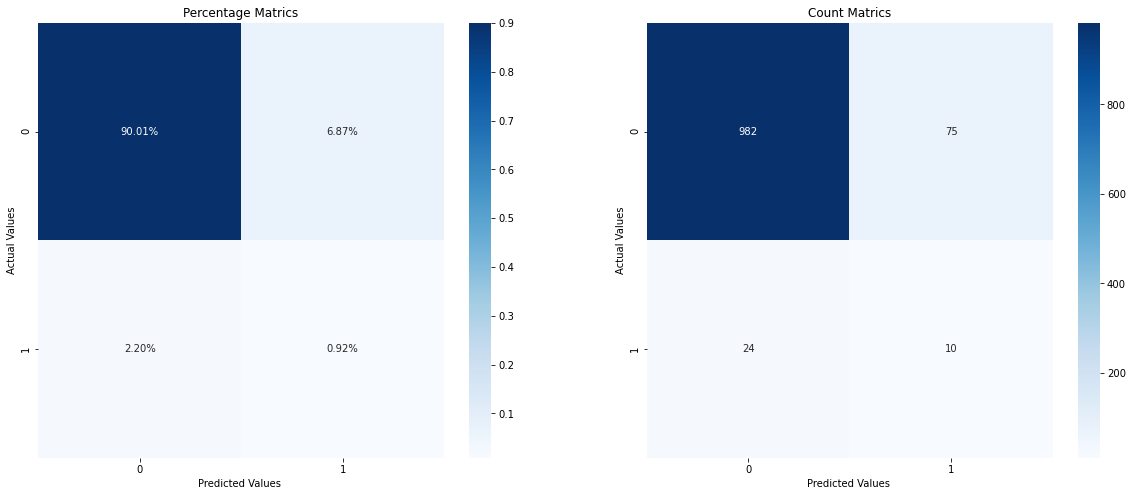

In [87]:
confusion_matrics(trained_rand_knn, X_test_sm, y_test_sm)

## Results

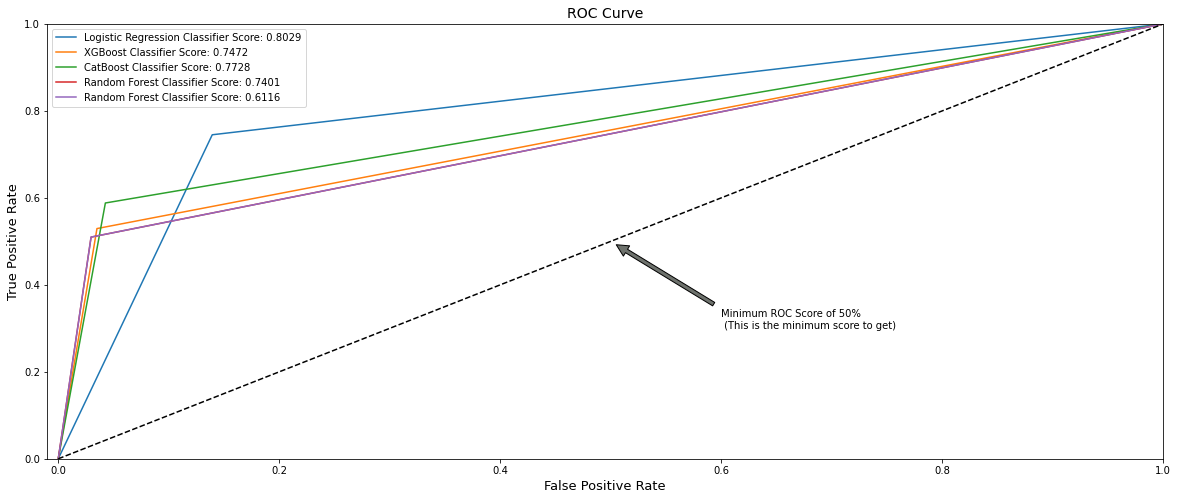

In [88]:
# Plotting ROC-AUC curve
from sklearn.metrics import roc_curve

smote_pred_reg_sm = trained_logistic_reg.predict(X_test_sd)
smote_prediction_rfc = trained_random_forest.predict(X_test_top)
smote_prediction_xgb = trained_xgboost.predict(X_test_top)
smote_prediction_cat = trained_catboost.predict(X_test_top)
smote_prediction_knn = trained_rand_knn.predict(X_test_top)

log_fpr, log_tpr, log_thresold = roc_curve(y_test, smote_pred_reg_sm)
rfc_fpr, rfc_tpr, rfc_threshold = roc_curve(y_test, smote_prediction_rfc)
xgb_fpr, xgb_tpr, xgb_thresold = roc_curve(y_test, smote_prediction_xgb)
cat_fpr, cat_tpr, cat_thresold = roc_curve(y_test, smote_prediction_cat)
knn_fpr, knn_tpr, knn_thresold = roc_curve(y_test, smote_prediction_knn)


def graph_roc_curve_multiple(log_fpr, log_tpr, rfc_fpr, rfc_tpr,xgb_fpr, xgb_tpr,cat_fpr, cat_tpr, knn_fpr, knn_tpr):
    plt.figure(figsize=(20,8))
    plt.title('ROC Curve', fontsize=14)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_test, smote_pred_reg_sm)))
    plt.plot(xgb_fpr, xgb_tpr, label='XGBoost Classifier Score: {:.4f}'.format(roc_auc_score(y_test, smote_prediction_xgb)))
    plt.plot(cat_fpr, cat_tpr, label='CatBoost Classifier Score: {:.4f}'.format(roc_auc_score(y_test, smote_prediction_cat)))
    plt.plot(rfc_fpr, rfc_tpr, label='Random Forest Classifier Score: {:.4f}'.format(roc_auc_score(y_test, smote_prediction_rfc)))
    plt.plot(rfc_fpr, rfc_tpr, label='Random Forest Classifier Score: {:.4f}'.format(roc_auc_score(y_test, smote_prediction_knn)))

    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=13)
    plt.ylabel('True Positive Rate', fontsize=13)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(log_fpr, log_tpr, rfc_fpr, rfc_tpr,xgb_fpr, xgb_tpr,cat_fpr, cat_tpr, knn_fpr, knn_tpr)
plt.show()


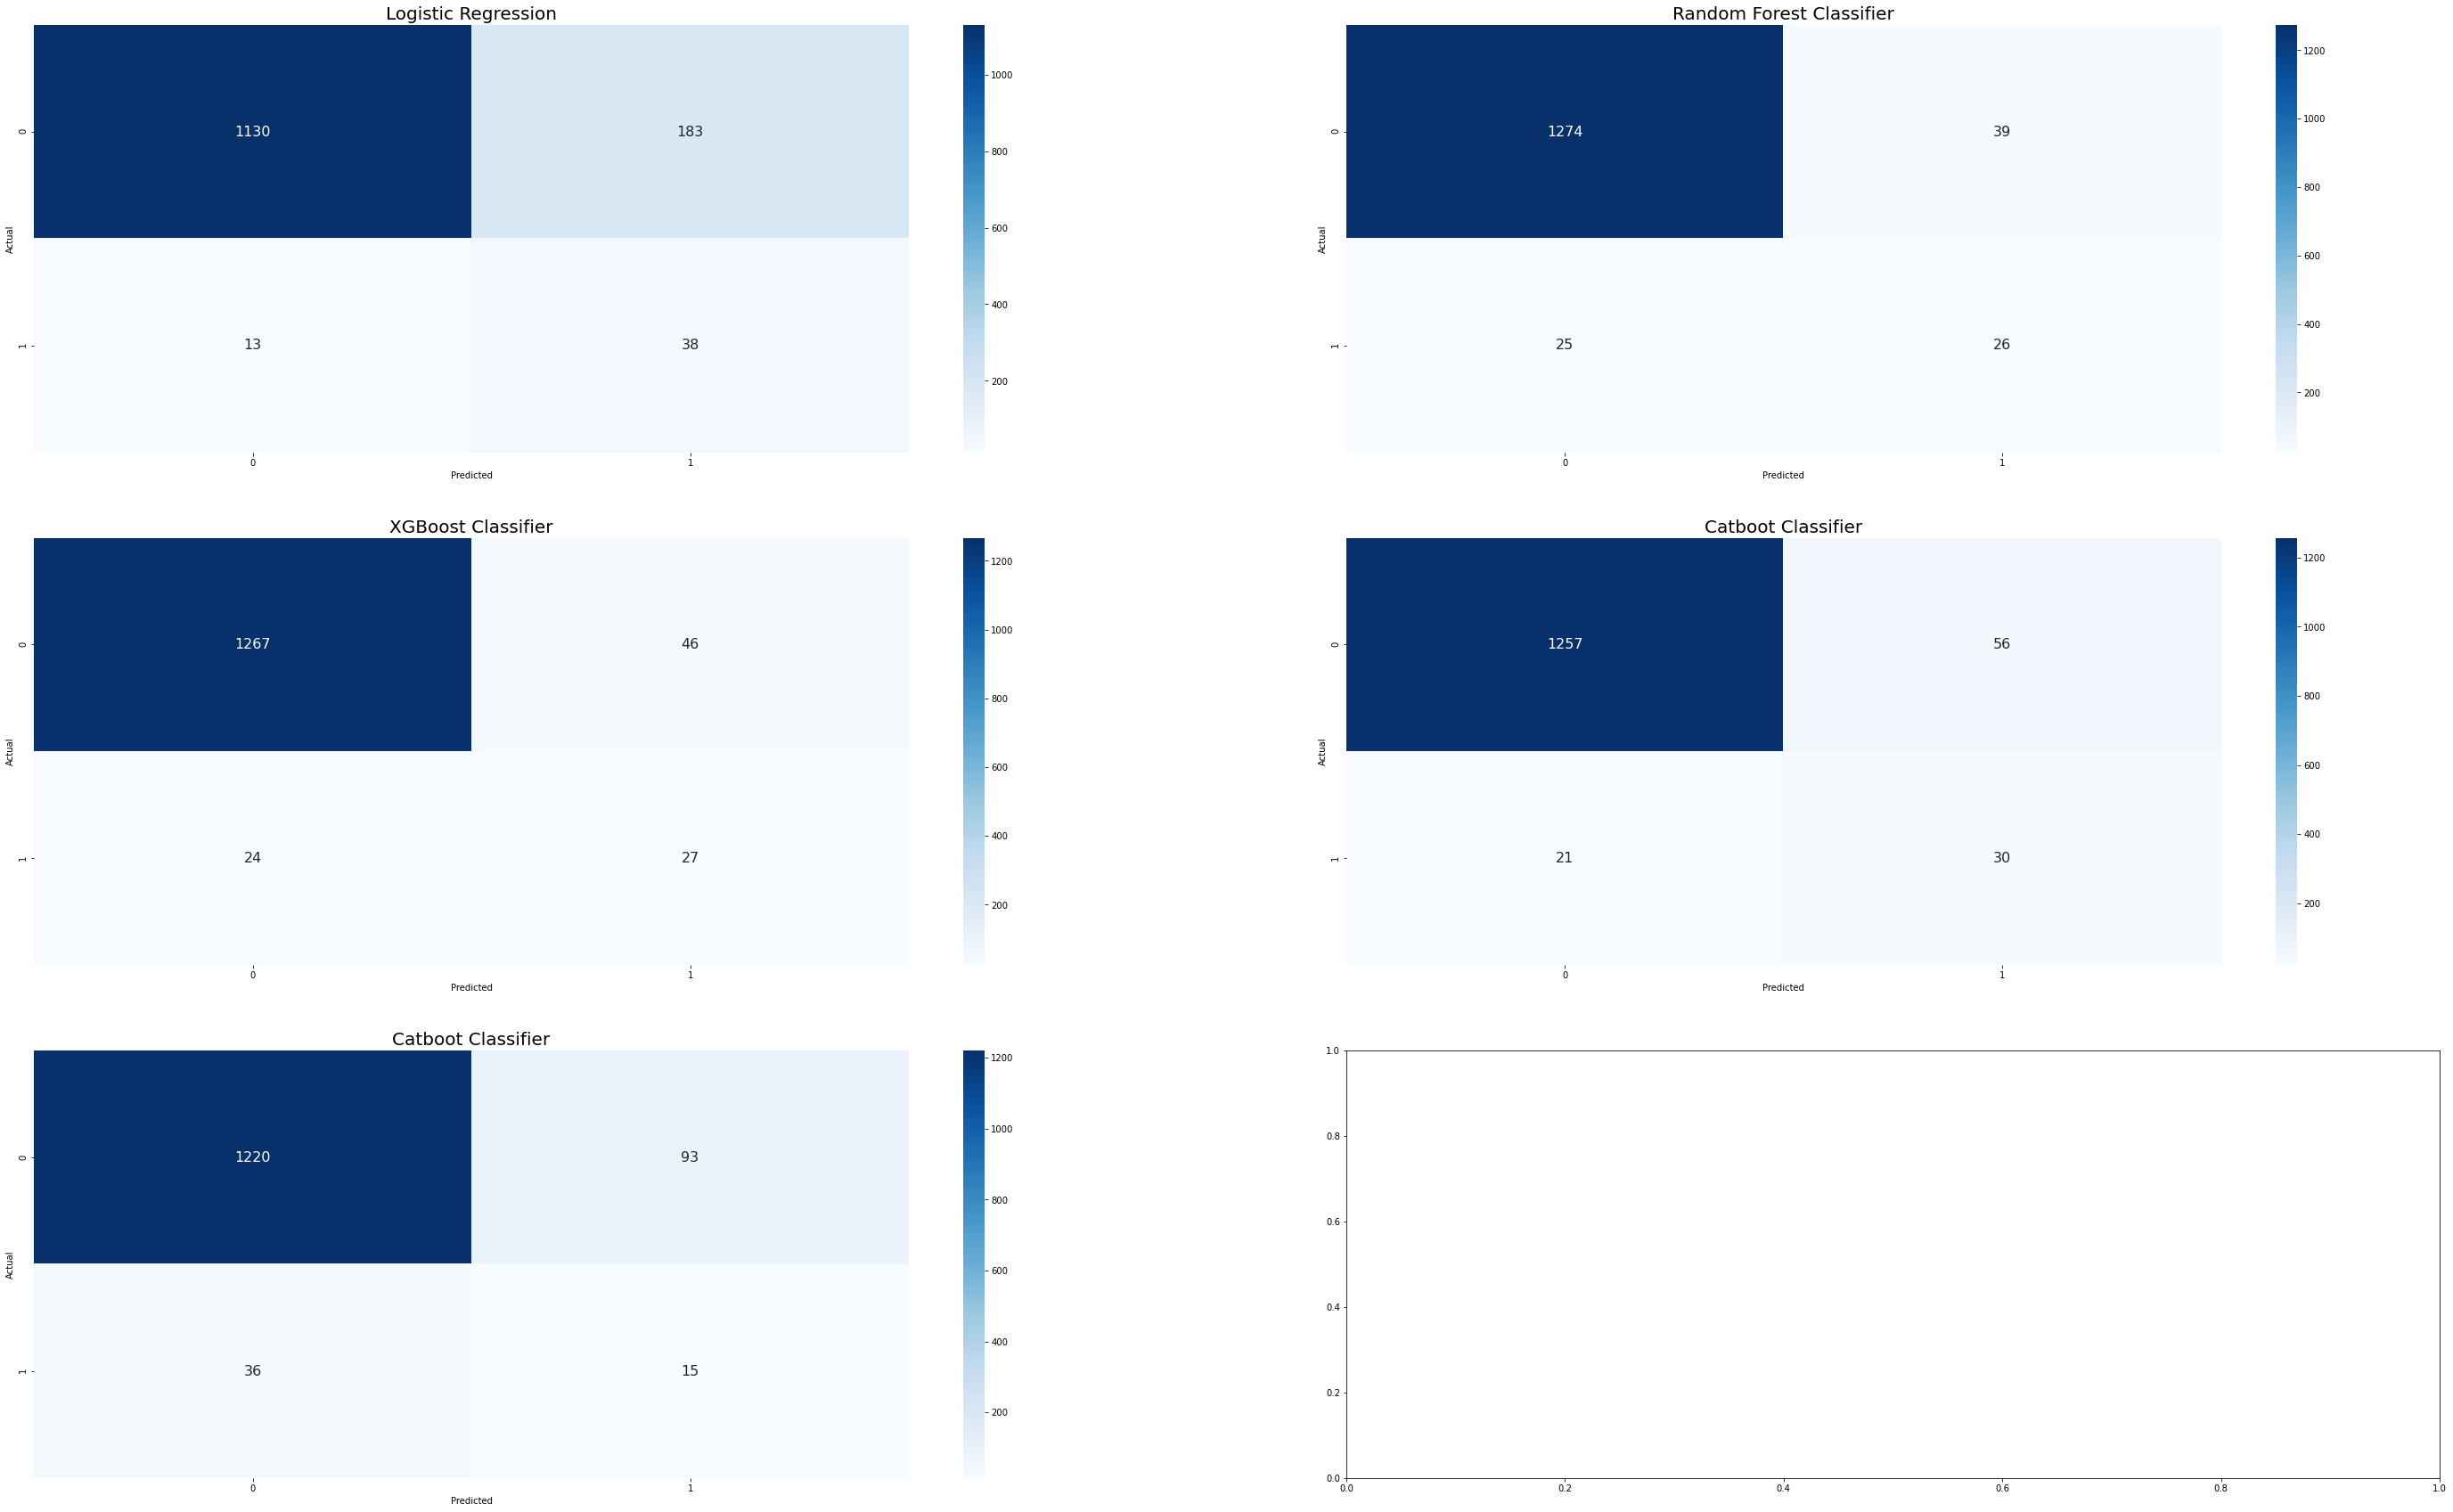

In [89]:
# Plotting confusion matrix for each classifier
conf_mx0 = confusion_matrix(y_test,smote_pred_reg_sm)
conf_mx1 = confusion_matrix(y_test,smote_prediction_rfc)
conf_mx2 = confusion_matrix(y_test,smote_prediction_xgb)
conf_mx3 = confusion_matrix(y_test,smote_prediction_cat)
conf_mx4 = confusion_matrix(y_test,smote_prediction_knn)
# conf_mx5 = confusion_matrix(y_test,smote_prediction_svm)

heat_cm0 = pd.DataFrame(conf_mx0, columns=np.unique(y_test), index = np.unique(y_test))
heat_cm0.index.name = 'Actual'
heat_cm0.columns.name = 'Predicted'

heat_cm1 = pd.DataFrame(conf_mx1, columns=np.unique(y_test), index = np.unique(y_test))
heat_cm1.index.name = 'Actual'
heat_cm1.columns.name = 'Predicted'

heat_cm2 = pd.DataFrame(conf_mx2, columns=np.unique(y_test), index = np.unique(y_test))
heat_cm2.index.name = 'Actual'
heat_cm2.columns.name = 'Predicted'

heat_cm3 = pd.DataFrame(conf_mx3, columns=np.unique(y_test), index = np.unique(y_test))
heat_cm3.index.name = 'Actual'
heat_cm3.columns.name = 'Predicted'

heat_cm4 = pd.DataFrame(conf_mx4, columns=np.unique(y_test), index = np.unique(y_test))
heat_cm4.index.name = 'Actual'
heat_cm4.columns.name = 'Predicted'


f, ax = plt.subplots(3, 2, figsize=(20,30))
f.subplots_adjust(left=None, bottom=None, right= 2, top=None, wspace=None, hspace= None)

sns.heatmap(heat_cm0, cmap="Blues", annot=True, annot_kws={"size": 16},fmt='g', ax = ax[0][0])
ax[0][0].set_title('Logistic Regression', fontsize = 20)
sns.heatmap(heat_cm1, cmap="Blues", annot=True, annot_kws={"size": 16},fmt='g', ax = ax[0][1])
ax[0][1].set_title('Random Forest Classifier', fontsize = 20)
sns.heatmap(heat_cm2, cmap="Blues", annot=True, annot_kws={"size": 16},fmt='g', ax = ax[1][0])
ax[1][0].set_title('XGBoost Classifier', fontsize = 20)
sns.heatmap(heat_cm3, cmap="Blues", annot=True, annot_kws={"size": 16},fmt='g', ax = ax[1][1])
ax[1][1].set_title('Catboot Classifier', fontsize = 20)
sns.heatmap(heat_cm4, cmap="Blues", annot=True, annot_kws={"size": 16},fmt='g', ax = ax[2][0])
ax[2][0].set_title('Catboot Classifier', fontsize = 20)

plt.show()

As you can see from the results on validation set, all of our models still have problems in detecting the companies close to bankruptcy. The algorithm that recognizes more observations of the minority class is Logistic Regression, even though this comes with a great cost in term of precision (high presence of false negatives). Despite the presence of the errors, in this case I think that it is better to identify a non close to bankruptcy observation as close to bankrouptcy than vice versa, so it could be a useful model.

In [98]:
classification_report(trained_logistic_reg, X_test_sd, y_test)

              precision    recall  f1-score   support

  Fin_Stable       0.99      0.86      0.92      1313
Fin_Unstable       0.17      0.75      0.28        51

    accuracy                           0.86      1364
   macro avg       0.58      0.80      0.60      1364
weighted avg       0.96      0.86      0.90      1364



In [104]:
classification_report(trained_random_forest, X_test_top, y_test)

              precision    recall  f1-score   support

  Fin_Stable       0.98      0.97      0.98      1313
Fin_Unstable       0.40      0.51      0.45        51

    accuracy                           0.95      1364
   macro avg       0.69      0.74      0.71      1364
weighted avg       0.96      0.95      0.96      1364



In [105]:
classification_report(trained_xgboost, X_test_top, y_test)

              precision    recall  f1-score   support

  Fin_Stable       0.98      0.96      0.97      1313
Fin_Unstable       0.37      0.53      0.44        51

    accuracy                           0.95      1364
   macro avg       0.68      0.75      0.70      1364
weighted avg       0.96      0.95      0.95      1364



In [106]:
classification_report(trained_rand_knn, X_test_top, y_test)

              precision    recall  f1-score   support

  Fin_Stable       0.97      0.93      0.95      1313
Fin_Unstable       0.14      0.29      0.19        51

    accuracy                           0.91      1364
   macro avg       0.56      0.61      0.57      1364
weighted avg       0.94      0.91      0.92      1364



In [101]:
classification_report(trained_catboost, X_test_top, y_test)

              precision    recall  f1-score   support

  Fin_Stable       0.98      0.96      0.97      1313
Fin_Unstable       0.35      0.59      0.44        51

    accuracy                           0.94      1364
   macro avg       0.67      0.77      0.70      1364
weighted avg       0.96      0.94      0.95      1364



Exactly as shown using validation data we can see how the metric considered (F1) is higher using RandomForest. Nevertheless, in this case, the best decision is to use Logistic regression because it can better recognize the minority class even misclassifying some not close to bankruptcy companies as close to bankruptcy.